In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import librosa
import scipy
import os

In [2]:
#忽視librosa出現的warning
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### 讀取檔案路徑

In [3]:
music_path = "music"
folder_names = os.listdir(music_path)
print(folder_names) #紀錄有哪些資料夾(類別)

['Blue', 'Classical', 'Country', 'Disco', 'EDM', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'Reggae']


In [4]:
music_folders=[] #儲存各類別資料夾中的檔案名稱
for folder in folder_names:
    file_names=[]
    for file_name in os.listdir(music_path+"/"+folder):
        file_names.append(music_path+"/"+folder+"/"+file_name)
    music_folders.append(file_names)

class_count_list = [len(files) for files in music_folders] #紀錄每個類別各有多少檔案
print("class count: ", len(music_folders))
print("class file count: ", class_count_list)

class count:  10
class file count:  [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


### 繪製頻譜圖

In [5]:
#取得音訊的array
def getAudio(audio_path):
    data, sample_rate = librosa.load(audio_path) #讀成 array
    if len(data.shape)==2: #若為雙通道則相加平均
        data = data.T
        data = (data[0]+data[1])/2
    save_len = int(len(data)*0.6)
    save_index = (len(data)-save_len)//2
    data=data[save_index:save_index+save_len]
    return sample_rate, data #回傳sample rate 與 array

In [6]:
def getLogMelScale(sample_rate, signals, frame_length, frame_step, num_mel_bins): #傳入取樣率 訊號(聲音矩陣) frame長度 frame移動距離
    melspec = librosa.feature.melspectrogram(signals,sample_rate,n_fft=frame_length,\
                                                            hop_length=frame_step,n_mels=num_mel_bins) #取得mel的filterbank
    logmelspec = librosa.amplitude_to_db(melspec) #取對數
    return logmelspec

In [7]:
def saveImg(sample_rate, logmelspec, save_path, show=False):
    fig = plt.figure(figsize = (8, 4))
    librosa.display.specshow(logmelspec, sr=sample_rate)
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0.0)
    if show: #設定顯示圖片顯示，反之不顯示
        plt.show()
    else:
        plt.close('all')

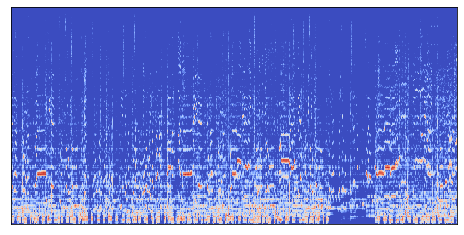

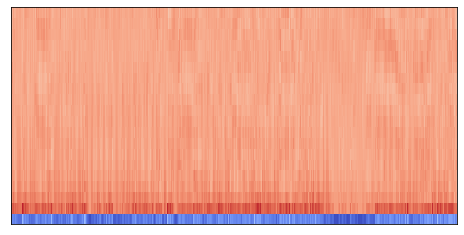

In [8]:
sample_rate, data = getAudio(music_folders[0][0])
logmelspec = getLogMelScale(sample_rate, data, 1024, 512, 256)
saveImg(sample_rate, logmelspec, "mel_augmentation_test.png", True)
mfccs = librosa.feature.mfcc(S = logmelspec)
saveImg(sample_rate, mfccs, "mfcc_augmentation_test.png", True)

In [9]:
spectrogram_path = "ImageData/augmentation/spectrogram"
if not os.path.isdir(spectrogram_path): #若沒有spectrogram資料夾則產生
    os.mkdir(spectrogram_path)

mfcc_path = "ImageData/augmentation/mfcc"
if not os.path.isdir(mfcc_path): #若沒有mfcc資料夾則產生
    os.mkdir(mfcc_path)

for i, music_folder in enumerate(music_folders):
#     if i < 4:      #我記憶體很可撥，要分段執行
#         continue
#     if i==4:
#         break
    class_type = folder_names[i]
    spect_folder = spectrogram_path+"/"+class_type
    mfcc_folder = mfcc_path+"/"+class_type
    if not os.path.isdir(spect_folder): #產生儲存各類別spectrogram的資料夾
        os.mkdir(spect_folder)
    if not os.path.isdir(mfcc_folder): #產生儲存各類別mfcc的資料夾
        os.mkdir(mfcc_folder)

    for count, music_name in enumerate(music_folder):
        sample_rate, data = getAudio(music_name)
        logmelspec = getLogMelScale(sample_rate, data, 1024, 512, 256)
        save_path = spect_folder+"/"+str(class_type)+"{0:03d}".format(count)+".png"
        saveImg(sample_rate, logmelspec, save_path)
        print(save_path, end=", ")
        mfccs = librosa.feature.mfcc(S = logmelspec)
        save_path = mfcc_folder+"/"+str(class_type)+"{0:03d}".format(count)+".png"
        saveImg(sample_rate, mfccs, save_path)
        print(save_path)

ImageData/augmentation/spectrogram/Pop/Pop000.png, ImageData/augmentation/mfcc/Pop/Pop000.png
ImageData/augmentation/spectrogram/Pop/Pop001.png, ImageData/augmentation/mfcc/Pop/Pop001.png
ImageData/augmentation/spectrogram/Pop/Pop002.png, ImageData/augmentation/mfcc/Pop/Pop002.png
ImageData/augmentation/spectrogram/Pop/Pop003.png, ImageData/augmentation/mfcc/Pop/Pop003.png
ImageData/augmentation/spectrogram/Pop/Pop004.png, ImageData/augmentation/mfcc/Pop/Pop004.png
ImageData/augmentation/spectrogram/Pop/Pop005.png, ImageData/augmentation/mfcc/Pop/Pop005.png
ImageData/augmentation/spectrogram/Pop/Pop006.png, ImageData/augmentation/mfcc/Pop/Pop006.png
ImageData/augmentation/spectrogram/Pop/Pop007.png, ImageData/augmentation/mfcc/Pop/Pop007.png
ImageData/augmentation/spectrogram/Pop/Pop008.png, ImageData/augmentation/mfcc/Pop/Pop008.png
ImageData/augmentation/spectrogram/Pop/Pop009.png, ImageData/augmentation/mfcc/Pop/Pop009.png
ImageData/augmentation/spectrogram/Pop/Pop010.png, ImageData